In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_data = pd.read_csv('./titanic/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('./titanic/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
train_data[['Survived','SibSp','Parch','Pclass']].corr()

,Survived,SibSp,Parch,Pclass
Survived,1.000000,-0.035322,0.081629,-0.338481
SibSp,-0.035322,1.000000,0.414838,0.083081
Parch,0.081629,0.414838,1.000000,0.018443
Pclass,-0.338481,0.083081,0.018443,1.000000


In [7]:
train_data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
train_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Cabin 제거
train_data.dropna(axis=1,thresh=500,inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
# Embarked 최빈값('S')으로 대체
train_data['Embarked'].fillna('S',inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
# Embarked 숫자로 변경 {'S': 1 ,'C': 2 , 'Q' : 3 } 
train_data['Embarked'].replace({'S': 1 ,'C': 2 , 'Q' : 3 },inplace=True)
train_data['Embarked'].describe()

count    891.000000
mean       1.361392
std        0.635673
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: Embarked, dtype: float64

In [12]:
# Sex 숫자로 변경 {'male':1,'female':2}
train_data['Sex'].replace({'male': 1 ,'female': 2 },inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,2


In [13]:
train_data['Name'] = train_data['Name'].apply(lambda x:x[x.find(',')+2:x.find('.')])
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,Mrs,2,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,Miss,2,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,Mrs,2,35.0,1,0,113803,53.1000,1
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,1,27.0,0,0,211536,13.0000,1
887,888,1,1,Miss,2,19.0,0,0,112053,30.0000,1
888,889,0,3,Miss,2,NaN,1,2,W./C. 6607,23.4500,1
889,890,1,1,Mr,1,26.0,0,0,111369,30.0000,2


In [24]:
train_data['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [31]:
train_data.loc[(train_data['Survived']==0)]['Name'].value_counts()

Mr          436
Miss         55
Mrs          26
Master       17
Rev           6
Dr            4
Don           1
Major         1
Col           1
Capt          1
Jonkheer      1
Name: Name, dtype: int64

In [32]:
#Name 컬럼 삭제
train_data.drop(columns='Name',axis=1,inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,2,35.0,1,0,113803,53.1000,1
4,5,0,3,1,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,1
887,888,1,1,2,19.0,0,0,112053,30.0000,1
888,889,0,3,2,NaN,1,2,W./C. 6607,23.4500,1
889,890,1,1,1,26.0,0,0,111369,30.0000,2


In [33]:
#Ticket 컬럼 삭제
train_data.drop(columns='Ticket',axis=1,inplace=True)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,2,38.0,1,0,71.2833,2
2,3,1,3,2,26.0,0,0,7.9250,1
3,4,1,1,2,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,1
887,888,1,1,2,19.0,0,0,30.0000,1
888,889,0,3,2,NaN,1,2,23.4500,1
889,890,1,1,1,26.0,0,0,30.0000,2


In [123]:
train_data.loc[(train_data['Survived']==1)]['Embarked'].value_counts()

1    219
2     93
3     30
Name: Embarked, dtype: int64

In [124]:
train_data['Embarked'].value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

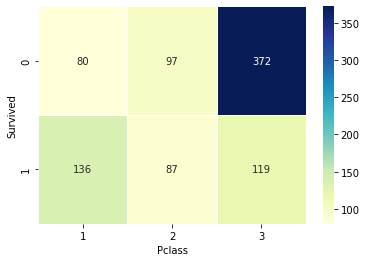

In [38]:
table = train_data.pivot_table(index=['Survived'],columns=['Pclass'],
                           aggfunc='size')
table
sns.heatmap(table,annot=True, fmt='d',cmap='YlGnBu',linewidths=.5, cbar=True)

plt.show()


In [95]:
f_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==1)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==1)]['Pclass'].count()
f_d = 1-f_s
f_d = round(f_d*100,2)
f_s = round(f_s*100,2)
f_s,f_d

(62.96, 37.04)

In [96]:
s_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==2)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==2)]['Pclass'].count()
s_d = 1-s_s
s_d = round(s_d*100,2)
s_s = round(s_s*100,2)
s_s,s_d

(47.28, 52.72)

In [97]:
t_s = train_data.loc[(train_data['Survived']==1)&(train_data['Pclass']==3)]['Pclass'].count()\
/train_data.loc[(train_data['Pclass']==3)]['Pclass'].count()
t_d = 1-t_s
t_d = round(t_d*100,2)
t_s = round(t_s*100,2)
t_s,t_d

(24.24, 75.76)

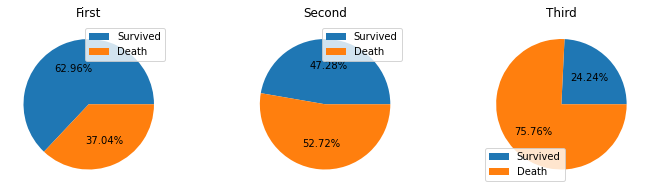

In [131]:
f,ax = plt.subplots(1,3,figsize=(12,3))
ax[0].pie([f_s,f_d],autopct='%.2f%%')
ax[1].pie([s_s,s_d],autopct='%.2f%%')
ax[2].pie([t_s,t_d],autopct='%.2f%%')
for idx, i in enumerate(['First','Second','Third']):    
    ax[idx].set_title(i)
    ax[idx].legend(['Survived','Death'])
plt.show()